## Setup:

In [32]:
import os
import json
from pathlib import Path
from collections import Counter
import pandas as pd

# --- CONFIG ---
BASE_PATH = Path("/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/data/llm_subtopic")
MODES = ["single_label", "multi_label"]

# Note: Health becomes part of the Lifestyle
LABEL_MAP = {
    "Health": "Lifestyle"
}

records = []

for mode in MODES:
    mode_path = BASE_PATH / mode
    topic_files = sorted(mode_path.glob("topic_*.json"))
    
    for file in topic_files:
        with open(file, "r") as f:
            data = json.load(f)
            topic_id = data.get("topic", file.stem.replace("topic_", ""))
            samples = data.get("samples", [])

            # Collect and remap labels
            all_labels = []
            for s in samples:
                label_field = s.get("gpt_label", "").strip()
                if not label_field:
                    continue
                labels = [LABEL_MAP.get(l.strip(), l.strip()) for l in label_field.split(",")]
                all_labels.extend(labels)

            label_counts = Counter(all_labels)
            total_label_count = sum(label_counts.values())
            assigned_label = label_counts.most_common(1)[0][0] if label_counts else "Unlabeled"
            diversity = len(label_counts)
            coherence = (label_counts[assigned_label] / total_label_count) if total_label_count > 0 else 0.0

            records.append({
                "mode": mode,
                "file": file.name,
                "topic": topic_id,
                "assigned_label": assigned_label,
                "diversity": diversity,
                "coherence": round(coherence, 3),
                "total_samples": len(samples),
                "label_counts": dict(label_counts)  # KEEP THIS
            })

# --- Create DataFrame ---
df_summary = pd.DataFrame(records)

# Expand label_counts into separate columns (but keep original column too)
label_df = df_summary["label_counts"].apply(pd.Series).fillna(0).astype(int)
df_final = pd.concat([df_summary, label_df], axis=1)  # DO NOT DROP label_counts

# Sort for readability
df_final = df_final.sort_values(by=["mode", "topic"])

# Preview
print(df_final.head())

# Optional: save
df_final.to_csv("llm_cluster_summary.csv", index=False)


            mode             file  topic assigned_label  diversity  coherence  \
98   multi_label  topic_0000.json      0       Politics          9      0.457   
99   multi_label  topic_0001.json      1       Politics         14      0.390   
100  multi_label  topic_0002.json      2         Fossil          7      0.390   
101  multi_label  topic_0003.json      3      Renewable         11      0.211   
102  multi_label  topic_0004.json      4       Politics         10      0.513   

     total_samples                                       label_counts  \
98              20  {'Politics': 16, 'Activism': 7, 'Disaster': 4,...   
99              20  {'Renewable': 4, 'Politics': 16, 'Fossil': 5, ...   
100             20  {'Politics': 15, 'Fossil': 16, 'Lifestyle': 3,...   
101             20  {'Lifestyle': 2, 'Waste': 7, 'Renewable': 8, '...   
102             20  {'Politics': 20, 'Disaster': 2, 'Renewable': 1...   

     Politics  Activism  ...  Climate Disinformation  Wildlife  \
98      

In [30]:
df_summary

,mode,file,topic,assigned_label,diversity,coherence,total_samples,label_counts
0,single_label,topic_0000.json,0,Politics,4,0.750,20,"{'Politics': 15, 'Activism': 1, 'Nature': 1, '..."
1,single_label,topic_0001.json,1,Politics,5,0.750,20,"{'Renewable': 2, 'Politics': 15, 'Disaster': 1..."
2,single_label,topic_0002.json,2,Fossil,3,0.700,20,"{'Fossil': 14, 'Politics': 5, 'Nature': 1}"
3,single_label,topic_0003.json,3,Renewable,8,0.300,20,"{'Lifestyle': 2, 'Nuclear': 1, 'Renewable': 6,..."
4,single_label,topic_0004.json,4,Politics,5,0.800,20,"{'Politics': 16, 'Fossil': 1, 'Agriculture': 1..."
...,...,...,...,...,...,...,...,...
191,multi_label,topic_1044.json,1044,Politics,6,0.459,20,"{'Politics': 17, 'Renewable': 9, 'Weather': 2,..."
192,multi_label,topic_1045.json,1045,Nature,10,0.366,20,"{'Disaster': 1, 'Nature': 15, 'Waste': 4, 'Agr..."
193,multi_label,topic_1046.json,1046,Nature,13,0.296,20,"{'Nature': 8, 'Renewable': 3, 'Lifestyle': 5, ..."
194,multi_label,topic_1047.json,1047,Renewable,5,0.591,20,"{'Renewable': 13, 'Activism': 1, 'Nature': 5, ..."


In [29]:
df = pd.read_csv("/Users/tobiasmichelsen/Bachelor_Project/DS_BachelorProject_PH/EDA/GPT_EDA/llm_cluster_label_summary.csv")
df.head(50)

,mode,file,topic,assigned_label,diversity,coherence,total_samples,Politics,Activism,Nature,...,Climate Disinformation,Wildlife,EndangeredSpecies,- Activism,Climate Aid,Adaptation,ClimateScience,HealthRisks,Food,Immigration
0,multi_label,topic_0000.json,0,Politics,10,0.457,20,16,7,2,...,0,0,0,0,0,0,0,0,0,0
1,multi_label,topic_0001.json,1,Politics,15,0.390,20,16,4,1,...,0,0,0,0,0,0,0,0,0,0
2,multi_label,topic_0002.json,2,Fossil,8,0.390,20,15,0,4,...,0,0,0,0,0,0,0,0,0,0
3,multi_label,topic_0003.json,3,Renewable,11,0.211,20,4,7,1,...,0,0,0,0,0,0,0,0,0,0
4,multi_label,topic_0004.json,4,Politics,10,0.513,20,20,2,1,...,0,0,0,0,0,0,0,0,0,0
5,multi_label,topic_0005.json,5,Transportation,9,0.429,20,4,0,0,...,0,0,0,0,0,0,0,0,0,0
6,multi_label,topic_0006.json,6,Fossil,10,0.333,20,8,2,1,...,0,0,0,0,0,0,0,0,0,0
7,multi_label,topic_0007.json,7,Nature,11,0.216,20,7,8,8,...,0,0,0,0,0,0,0,0,0,0
8,multi_label,topic_0008.json,8,Renewable,9,0.488,20,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,multi_label,topic_0009.json,9,Waste,10,0.528,20,3,2,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
above_count10_globalglobal_label_counts[:14]

label
Politics          560
Renewable         286
Nature            222
Activism          193
Fossil            116
Lifestyle         101
Waste              98
Weather            80
Disaster           80
Transportation     50
Agriculture        49
Construction       33
Electricity        27
Technology         10
Name: count, dtype: int64

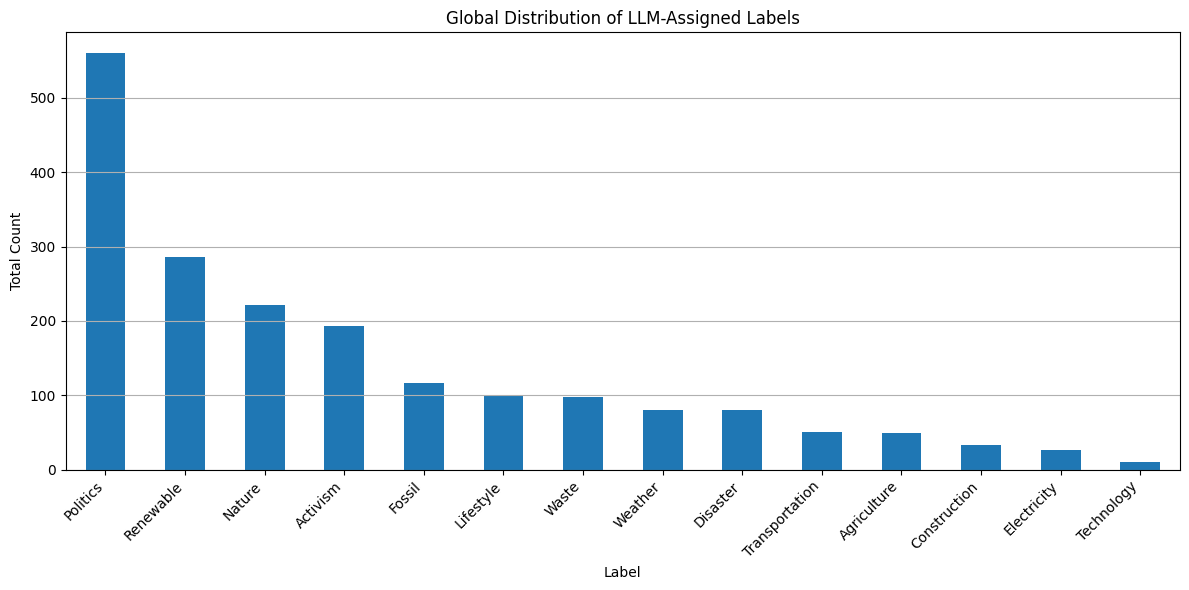

In [18]:
import matplotlib.pyplot as plt

global_label_counts = df_dist.groupby("label")["count"].sum().sort_values(ascending=False)
above_count10_global = global_label_counts[:14]

plt.figure(figsize=(12, 6))
above_count10_global.plot(kind="bar")
plt.title("Global Distribution of LLM-Assigned Labels")
plt.xlabel("Label")
plt.ylabel("Total Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(axis="y")
plt.show()


In [7]:
global_label_counts = df_dist.groupby("label")["count"].sum().sort_values(ascending=False)
print("Global label counts:\n", global_label_counts)


Global label counts:
 label
Politics                                                                                   560
Renewable                                                                                  286
Nature                                                                                     222
Activism                                                                                   193
Fossil                                                                                     116
Lifestyle                                                                                  101
Waste                                                                                       98
Weather                                                                                     80
Disaster                                                                                    80
Transportation                                                                              50
Agriculture           

36

In [8]:
# Count number of unique labels per topic
diversity = df_dist.groupby("topic")["label"].nunique()

# Most diverse cluster (highest number of different labels)
most_diverse = diversity.sort_values(ascending=False).head(1)
print("\nMost diverse cluster:\n", most_diverse)

# Least diverse cluster (only one label)
least_diverse = diversity[diversity == 1]
print("\nLeast diverse clusters (only one label):\n", least_diverse)



Most diverse cluster:
 topic
1010    11
Name: label, dtype: int64

Least diverse clusters (only one label):
 topic
42      1
44      1
45      1
1028    1
Name: label, dtype: int64


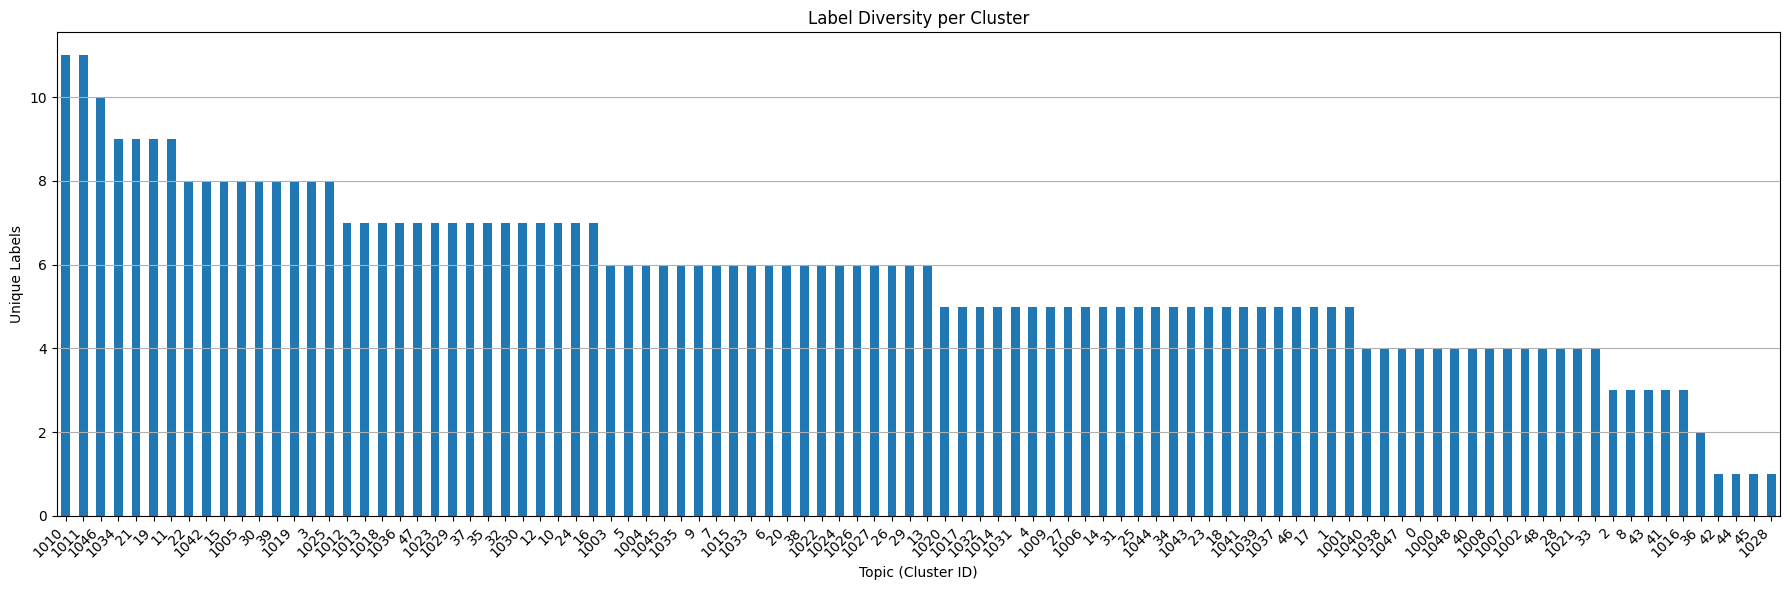

In [24]:
# Calculate diversity (number of unique labels per topic)
diversity = df_dist.groupby("topic")["label"].nunique().sort_values(ascending=False)

plt.figure(figsize=(18, 6))
diversity.plot(kind="bar")
plt.title("Label Diversity per Cluster")
plt.xlabel("Topic (Cluster ID)")
plt.ylabel("Unique Labels")
plt.xticks(rotation=45, ha="right")  # Hide x-axis labels if too many
plt.tight_layout()
plt.grid(axis="y")
plt.show()


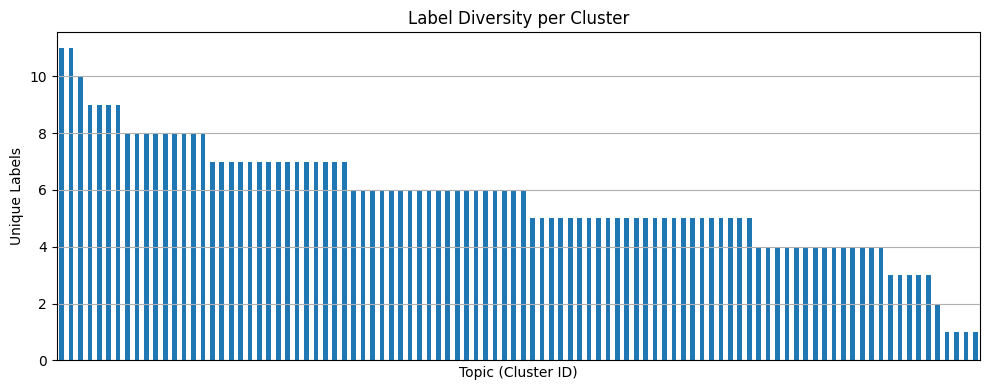

In [20]:
# Calculate diversity (number of unique labels per topic)
diversity = df_dist.groupby("topic")["label"].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
diversity.plot(kind="bar")
plt.title("Label Diversity per Cluster")
plt.xlabel("Topic (Cluster ID)")
plt.ylabel("Unique Labels")
plt.xticks([], [])  # Hide x-axis labels if too many
plt.tight_layout()
plt.grid(axis="y")
plt.show()
